# Importing Libraries

In [39]:
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf 
import pandas as pd 
import numpy as np 

import warnings 
warnings.filterwarnings('ignore') 

from tensorflow import keras 
from keras import layers 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.preprocessing import image_dataset_from_directory 

import os 
import matplotlib.image as mpimg


# data Visualisation

In [40]:
file="dogvscat"
classes=os.listdir(file)
classes

['cats', 'dogs']

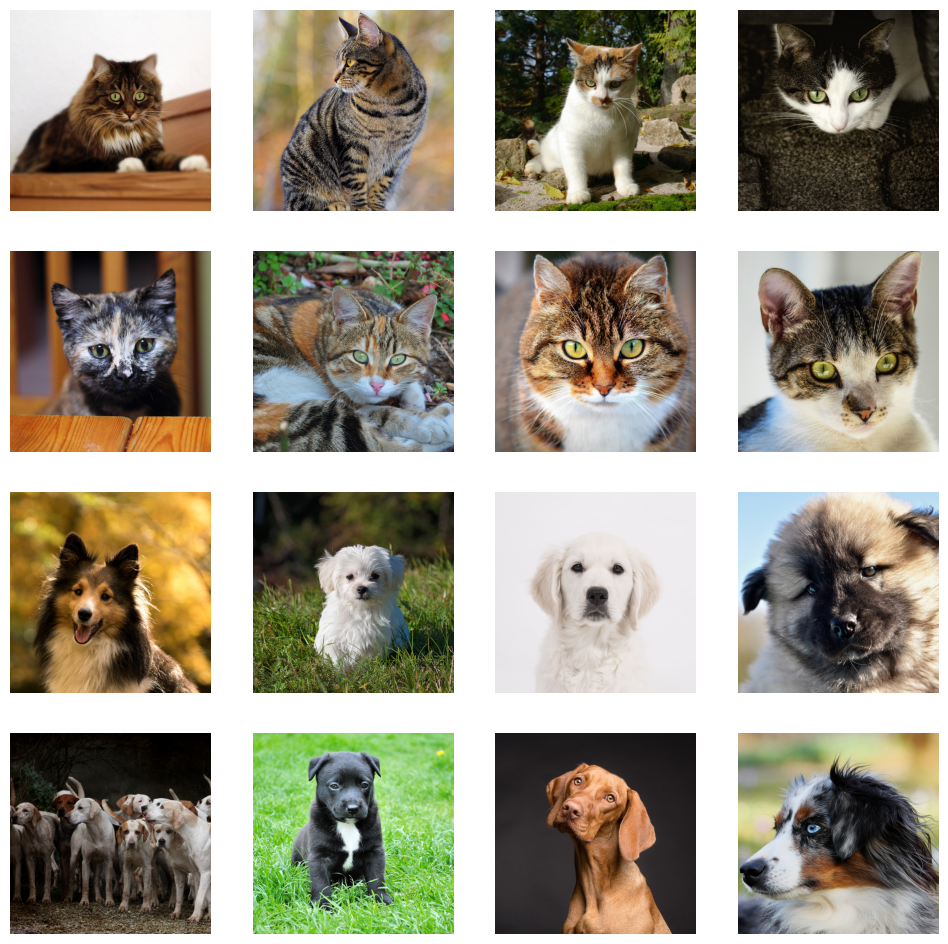

In [41]:
fig = plt.gcf() 
fig.set_size_inches(12, 12) 

cat_dir = os.path.join('dogvscat\cats') 
dog_dir = os.path.join('dogvscat\dogs') 
cat_names = os.listdir(cat_dir) 
dog_names = os.listdir(dog_dir) 

pic_index = 210

cat_images = [os.path.join(cat_dir, fname) 
			for fname in cat_names[pic_index-8:pic_index]] 
dog_images = [os.path.join(dog_dir, fname) 
			for fname in dog_names[pic_index-8:pic_index]] 

for i, img_path in enumerate(cat_images + dog_images): 
	sp = plt.subplot(4, 4, i+1) 
	sp.axis('Off') 

	img = mpimg.imread(img_path) 
	plt.imshow(img) 

plt.show() 


### Training preparation

In [42]:
root_dir="dogvscat"

train_data=image_dataset_from_directory(root_dir,image_size=(200,200),seed=1,subset="training",validation_split=0.2,batch_size=32)

test_data=image_dataset_from_directory(root_dir,image_size=(200,200),seed=1,subset="validation",validation_split=0.2,batch_size=32)

Found 550 files belonging to 2 classes.
Using 440 files for training.
Found 550 files belonging to 2 classes.
Using 110 files for validation.


In [43]:
model = tf.keras.models.Sequential([ 
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 

	layers.Flatten(), 
	layers.Dense(512, activation='relu'), 
	layers.BatchNormalization(), 
	layers.Dense(512, activation='relu'), 
	layers.Dropout(0.1), 
	layers.BatchNormalization(), 
	layers.Dense(512, activation='relu'), 
	layers.Dropout(0.2), 
	layers.BatchNormalization(), 
	layers.Dense(1, activation='sigmoid') 
]) 


In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 99, 99, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 48, 48, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 23, 23, 64)       

In [45]:
keras.utils.plot_model(model,show_dtype=True,show_layer_activations=True,show_shapes=True,show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [46]:
model.compile( 
	loss='binary_crossentropy', 
	optimizer='adam', 
	metrics=['accuracy'] 
) 


### Model Training 


In [47]:
history=model.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10


14/14 [==============================] - 33s 2s/step - loss: 0.9520 - accuracy: 0.5477 - val_loss: 13.8804 - val_accuracy: 0.4727
Epoch 2/10
14/14 [==============================] - 20s 1s/step - loss: 0.7822 - accuracy: 0.6091 - val_loss: 6.9802 - val_accuracy: 0.4727
Epoch 3/10
14/14 [==============================] - 22s 1s/step - loss: 0.6634 - accuracy: 0.6227 - val_loss: 2.5546 - val_accuracy: 0.4818
Epoch 4/10
14/14 [==============================] - 16s 965ms/step - loss: 0.6307 - accuracy: 0.6659 - val_loss: 2.8054 - val_accuracy: 0.5364
Epoch 5/10
14/14 [==============================] - 22s 1s/step - loss: 0.5677 - accuracy: 0.7318 - val_loss: 1.0304 - val_accuracy: 0.5545
Epoch 6/10
14/14 [==============================] - 16s 947ms/step - loss: 0.4999 - accuracy: 0.7545 - val_loss: 0.6978 - val_accuracy: 0.5727
Epoch 7/10
14/14 [==============================] - 16s 874ms/step - loss: 0.4552 - accuracy: 0.7795 - val_loss: 0.6937 - val_accuracy: 0.5727
Epoch 8/10
14/14 [===

In [50]:
history_df= pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.952018,0.547727,13.880437,0.472727
1,0.782167,0.609091,6.980193,0.472727
2,0.663441,0.622727,2.554637,0.481818
3,0.630666,0.665909,2.805372,0.536364
4,0.567679,0.731818,1.030354,0.554545
5,0.499869,0.754545,0.697759,0.572727
6,0.455224,0.779545,0.693734,0.572727
7,0.316218,0.863636,0.745150,0.581818
8,0.345181,0.854545,0.732125,0.554545
9,0.274050,0.881818,0.691349,0.572727


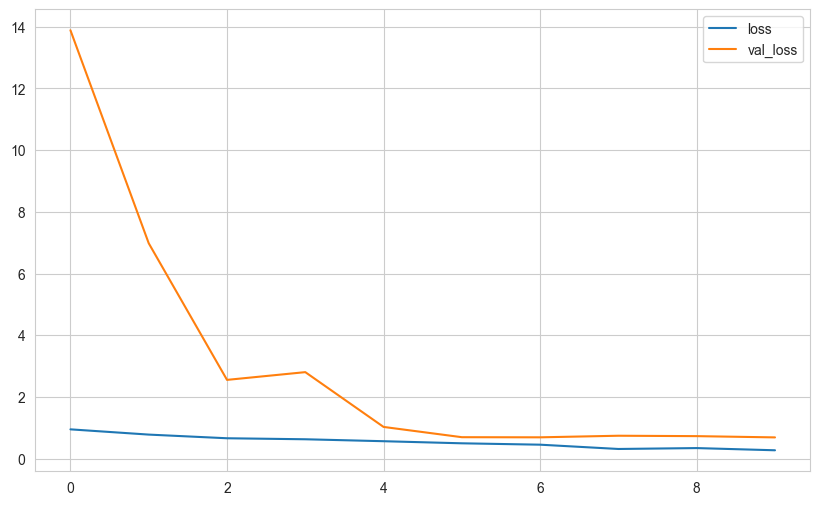

In [61]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=history_df[['loss', 'val_loss']],dashes=False)
plt.show()

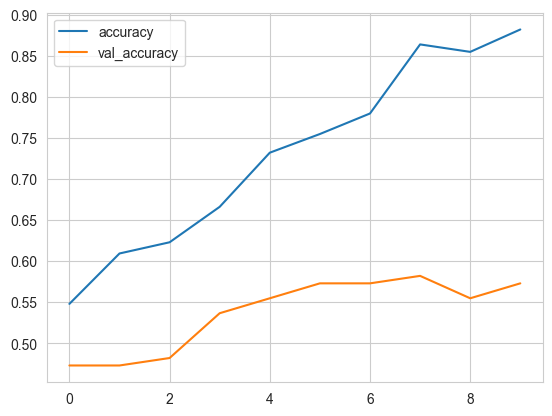

In [58]:
sns.set_style("whitegrid")
sns.lineplot(data=history_df[["accuracy","val_accuracy"]],dashes=False)
plt.show()

# Model Testing and Prediction


1/1 [==============================] - 0s 31ms/step
Dog


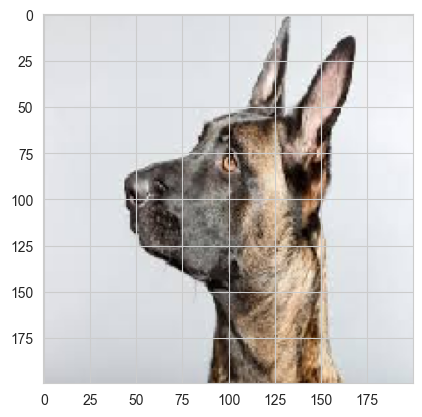

In [89]:
from keras.preprocessing import image 

test_image = image.load_img('test_images/test1.jpeg',target_size=(200,200)) 

plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 

result = model.predict(test_image) 

i=0
if(result>=0.5): 
    print("Dog") 
else: 
    print("Cat")


1/1 [==============================] - 0s 71ms/step
Cat


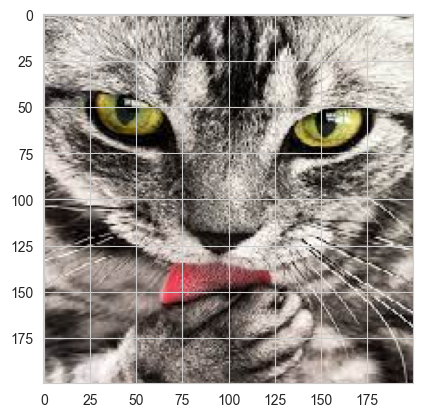

In [85]:
test_image = image.load_img('test_images/test2.jpeg',target_size=(200,200)) 

plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 

result = model.predict(test_image) 

i=0
if(result>=0.5): 
    print("Dog") 
else: 
    print("Cat")


1/1 [==============================] - 0s 41ms/step
Cat


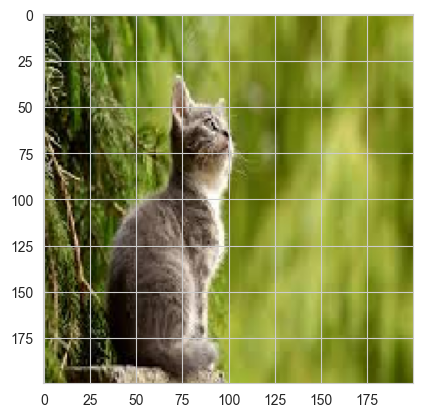

In [87]:
test_image = image.load_img('test_images/test3.jpeg',target_size=(200,200)) 

plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 

result = model.predict(test_image) 

i=0
if(result>=0.5): 
    print("Dog") 
else: 
    print("Cat")


1/1 [==============================] - 0s 43ms/step
Dog


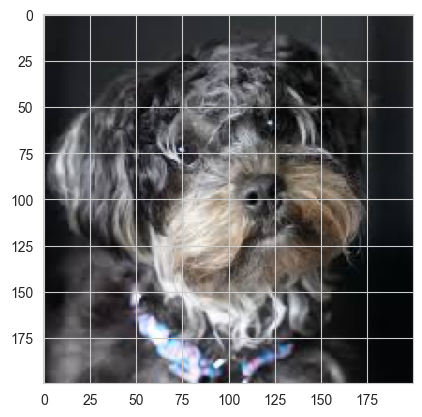

In [88]:
test_image = image.load_img('test_images/test4.jpeg',target_size=(200,200)) 

plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 

result = model.predict(test_image) 

i=0
if(result>=0.5): 
    print("Dog") 
else: 
    print("Cat")
